In [16]:
## LDO PMOS pass transistor Analysis

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d

## Assumptions 
1. Vdd = 1.8V 
2. Vout_LDO = 1.2V
3. W/L unit = 1u/0.18u
4. M_scale = 1000

In [ ]:
param_master = pd.read_csv("ldo_pmos_char.csv")

In [18]:
kgm_p = np.abs(param_master['kgmp Y'])
kcsg_p = np.abs(param_master['kcgs Y'])
kcgd_p = np.abs(param_master['kcgd Y'])
kgds_p = np.abs(param_master['kgds Y'])
ids = np.abs(param_master['ids Y'])
vgp = np.abs(param_master['kgmp X']) 

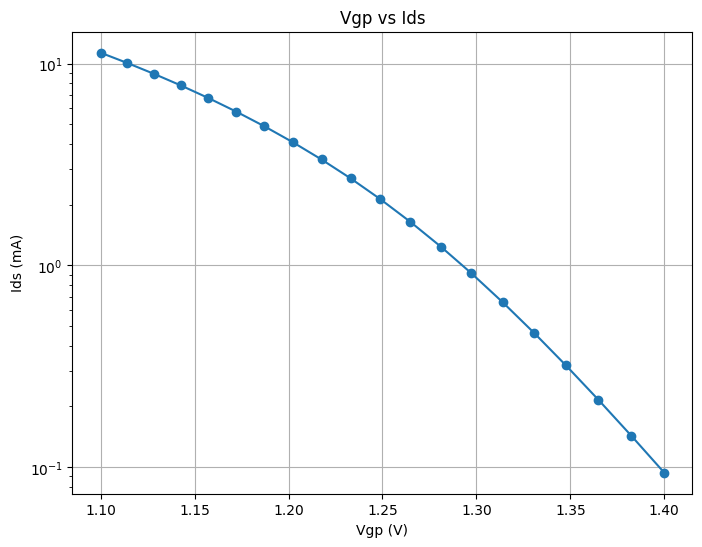

In [19]:
# plotting Ids vs Vgp
plt.figure(figsize=(8, 6))
plt.plot(vgp, ids * 1e3, marker='o')
plt.xlabel('Vgp (V)')
plt.ylabel('Ids (mA)')
plt.yscale('log')
plt.title('Vgp vs Ids')
plt.grid(True)
plt.show()

In [23]:

## find the voltage swing requirements based on max and min load current
I_max = 10e-3  # 10mA
I_min = 100e-6   # 100uA

# Interpolate to find the Vgp values corresponding to I_max and I_min

# ids and vgp are both increasing, so sort them for interpolation
sorted_idx = np.argsort(ids)
ids_sorted = ids.values[sorted_idx]
vgp_sorted = vgp.values[sorted_idx]

interp_func = interp1d(ids_sorted, vgp_sorted, kind='linear', fill_value='extrapolate')

vgp_I_max = float(interp_func(I_max))
vgp_I_min = float(interp_func(I_min))

print(f"Vgp for I_max ({I_max*1e3:.2f} mA): {vgp_I_max:.6f} V")
print(f"Vgp for I_min ({I_min*1e6:.2f} uA): {vgp_I_min:.6f} V")

Vgp_swing = np.abs(vgp_I_max - vgp_I_min)
print(f"Vgp Swing required: {Vgp_swing:.6f} V")

V_gp_cm = (vgp_I_max + vgp_I_min) / 2
print(f"Vgp Common Mode Voltage: {V_gp_cm:.6f} V")

Vgp for I_max (10.00 mA): 1.115024 V
Vgp for I_min (100.00 uA): 1.397810 V
Vgp Swing required: 0.282786 V
Vgp Common Mode Voltage: 1.256417 V


In [33]:
## Capacitance estimations at I_max 

C_Load = 100e-12  # 100pF

## Estimating cap values from kcgd

# Interpolate kcgd_p at vgp_I_max
kcgd_interp = interp1d(vgp, kcgd_p, kind='linear', fill_value='extrapolate')
cgd_p_max = float(kcgd_interp(vgp_I_max))*I_max  # in Farads
print(f"kcgd_p at Vgp for I_max ({vgp_I_max:.6f} V): {cgd_p_max*1e15:.3f} fF")

# Interpolate kcgs_p at vgp_I_max
kcgs_interp = interp1d(vgp, kcsg_p, kind='linear', fill_value='extrapolate')
cgs_p_max = float(kcgs_interp(vgp_I_max)) * I_max  # in Farads
print(f"kcgs_p at Vgp for I_max ({vgp_I_max:.6f} V): {cgs_p_max*1e15:.3f} fF")

# Interpolate kcds_p at vgp_I_max
kcds_p = np.abs(param_master['kcds Y'])
kcds_interp = interp1d(vgp, kcds_p, kind='linear', fill_value='extrapolate')
cds_p_max = float(kcds_interp(vgp_I_max)) * I_max  # in Farads
print(f"kcds_p at Vgp for I_max ({vgp_I_max:.6f} V): {cds_p_max*1e15:.3f} fF")

# Interpolte kgm_p at vgp_I_max
kgm_interp = interp1d(vgp, kgm_p, kind='linear', fill_value='extrapolate')
gm_p_max = float(kgm_interp(vgp_I_max)) * I_max  # in Siemens
print(f"gm_p at Vgp for I_max ({vgp_I_max:.6f} V): {gm_p_max*1e3:.3f} mS")

# Interpolte kgds_p at vgp_I_max
kgds_interp = interp1d(vgp, kgds_p, kind='linear', fill_value='extrapolate')
gds_p_max = float(kgds_interp(vgp_I_max)) * I_max  # in Siemens
print(f"gds_p at Vgp for I_max ({vgp_I_max:.6f} V): {gds_p_max*1e3:.3f} mS")


# Interpolate kcgd_p at vgp_I_min
cgd_p_min = float(kcgd_interp(vgp_I_min)) * I_min  # in Farads
print(f"kcgd_p at Vgp for I_min ({vgp_I_min:.6f} V): {cgd_p_min*1e15:.3f} fF")

# Interpolate kcgs_p at vgp_I_min
cgs_p_min = float(kcgs_interp(vgp_I_min)) * I_min  # in Farads
print(f"kcgs_p at Vgp for I_min ({vgp_I_min:.6f} V): {cgs_p_min*1e15:.3f} fF")

# Interpolate kcds_p at vgp_I_min
cds_p_min = float(kcds_interp(vgp_I_min)) * I_min  # in Farads
print(f"kcds_p at Vgp for I_min ({vgp_I_min:.6f} V): {cds_p_min*1e15:.3f} fF")

# Interpolte kgm_p at vgp_I_min
gm_p_min = float(kgm_interp(vgp_I_min)) * I_min  # in Siemens
print(f"gm_p at Vgp for I_min ({vgp_I_min:.6f} V): {gm_p_min*1e3:.3f} mS")
# Interpolte kgds_p at vgp_I_min
gds_p_min = float(kgds_interp(vgp_I_min)) * I_min
print(f"gds_p at Vgp for I_min ({vgp_I_min:.6f} V): {gds_p_min*1e3:.3f} mS")  # in Siemens



kcgd_p at Vgp for I_max (1.115024 V): 430.919 fF
kcgs_p at Vgp for I_max (1.115024 V): 1052.641 fF
kcds_p at Vgp for I_max (1.115024 V): 0.886 fF
gm_p at Vgp for I_max (1.115024 V): 89.227 mS
gds_p at Vgp for I_max (1.115024 V): 3.343 mS
kcgd_p at Vgp for I_min (1.397810 V): 379.285 fF
kcgs_p at Vgp for I_min (1.397810 V): 491.892 fF
kcds_p at Vgp for I_min (1.397810 V): 0.076 fF
gm_p at Vgp for I_min (1.397810 V): 2.428 mS
gds_p at Vgp for I_min (1.397810 V): 0.054 mS


In [ ]:
## Cap estimate 

Av = gm_p_max/gds_p_max

C_load_eff = C_Load + cgd_p_max*(1 + (1/Av)) + cds_p_max
print(f"Effective Load Capacitance: {C_load_eff*1e12:.3f} pF")

## Effective load capacitance including the Miller effect for the error amplifier
C_in = cgs_p_max + cgd_p_max*(1+Av)
print(f"Effective Input Capacitance including Miller effect: {C_in*1e12:.3f} pF")


Effective Load Capacitance: 100.448 pF
Effective Input Capacitance including Miller effect: 12.987 pF


In [43]:
# Capacitance and transconductance/gds estimates at I_min

Av_min = gm_p_min / gds_p_min

C_load_eff_min = C_Load + cgd_p_min * (1 + (1 / Av_min)) + cds_p_min
print(f"Effective Load Capacitance at I_min: {C_load_eff_min*1e12:.3f} pF")

C_in_min = cgs_p_min + cgd_p_min * (1 + Av_min)
print(f"Effective Input Capacitance at I_min including Miller effect: {C_in_min*1e12:.3f} pF")

Effective Load Capacitance at I_min: 100.388 pF
Effective Input Capacitance at I_min including Miller effect: 18.071 pF


In [42]:
## Bandwidth target and Reff estimate

BW_target = 2e6  # 2MHz

Reff_max = 1 / (2 * np.pi * BW_target * C_load_eff)
print(f"Effective max Resistance (Reff) for bandwidth target {BW_target:.1f} Hz: {Reff_max:.2f} Ohms")

rds_p = 1 / gds_p_max
print(f"Rds of the pass transistor at I_max: {rds_p:.2f} Ohms")

## R_L estimate based on <1% current overhead due to R_L

I_R_L = 0.01*I_max  # 1% of I_max
R_L = vgp_I_max / I_R_L
print(f"Load Resistance (R_L) for 1% current overhead at I_max: {R_L:.2f} Ohms")

R_L_eff = 1 / (1/R_L + 1/rds_p)
print(f"Effective Load Resistance (R_L_eff) considering Rds: {R_L_eff:.2f} Ohms")

f_bw = 1 / (2 * np.pi * R_L_eff * C_load_eff)
print(f"Bandwidth (f_bw) considering Rds: {f_bw/1e6:.2f} MHz")

Effective max Resistance (Reff) for bandwidth target 2000000.0 Hz: 792.23 Ohms
Rds of the pass transistor at I_max: 299.18 Ohms
Load Resistance (R_L) for 1% current overhead at I_max: 11150.24 Ohms
Effective Load Resistance (R_L_eff) considering Rds: 291.36 Ohms
Bandwidth (f_bw) considering Rds: 5.44 MHz


In [44]:
## Assuming Vin_DC for the error amplifier is 0.9V
Vin_DC_amp = 0.9
Vout_LDO = 1.2
R_L1 = ((Vout_LDO - Vin_DC_amp) / Vout_LDO)*R_L
print(f"R_L1 to drop {(Vout_LDO - Vin_DC_amp):.2f} V at I_max: {R_L1:.2f} Ohms")
R_L2 = R_L - R_L1
print(f"R_L2 to drop {Vin_DC_amp:.2f} V at I_max: {R_L2:.2f} Ohms")

R_L1 to drop 0.30 V at I_max: 2787.56 Ohms
R_L2 to drop 0.90 V at I_max: 8362.68 Ohms
